In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import LSTM

In [59]:
stock = "TSLA"
df = pd.DataFrame(yf.download(stock, '2020-01-01', '2022-12-31')["Close"])

[*********************100%***********************]  1 of 1 completed


In [14]:
df  = pd.read_excel("D:/KTrinh/R/time_series/Data/VN_GDP_2020.xlsx")

In [60]:
df.dropna(inplace=True)

In [69]:
def rolling(lag, data):
    A = []
    df = data.values
    for i in range(lag, len(df)):
        A.append(df[i-lag:i]) 
    return A

def train_test_split(x,y,test_size):
    i = int(len(x)*test_size)
    j = int(len(y)*test_size)
    return x[:i], x[i:], y[:j], y[j:]

def RNN(x, y, lag):
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(lag,1)))
    model.add(Dropout(0.3))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units=50))
    model.add(Dropout(0.3))
    model.add(Dense(units=1))

    #RMSProp is working fine with LSTM but so do ADAM optimizer
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(np.array(x), np.array(y), epochs=100, batch_size=50)
    return model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data = pd.DataFrame(scaler.fit_transform(df["Close"].values.reshape(-1,1)))
data

In [67]:
lag = 10
A = rolling(lag, data)
b = data.values[lag::]

deon, dete, keyon, keyte = train_test_split(A,b, test_size=0.5)

In [70]:
a = RNN(deon,keyon,lag)

Epoch 1/100
8/8 [==============================] - 23s 232ms/step - loss: 0.0958
Epoch 2/100
8/8 [==============================] - 2s 284ms/step - loss: 0.0528
Epoch 3/100
8/8 [==============================] - 2s 287ms/step - loss: 0.0463
Epoch 4/100
8/8 [==============================] - 2s 280ms/step - loss: 0.0452
Epoch 5/100
8/8 [==============================] - 2s 295ms/step - loss: 0.0369
Epoch 6/100
8/8 [==============================] - 2s 291ms/step - loss: 0.0118
Epoch 7/100
8/8 [==============================] - 2s 296ms/step - loss: 0.0076
Epoch 8/100
8/8 [==============================] - 2s 303ms/step - loss: 0.0074
Epoch 9/100
8/8 [==============================] - 3s 322ms/step - loss: 0.0082
Epoch 10/100
8/8 [==============================] - 2s 302ms/step - loss: 0.0067
Epoch 11/100
8/8 [==============================] - 2s 279ms/step - loss: 0.0069
Epoch 12/100
8/8 [==============================] - 2s 284ms/step - loss: 0.0063
Epoch 13/100
8/8 [==================

24/24 [==============================] - 1s 37ms/step


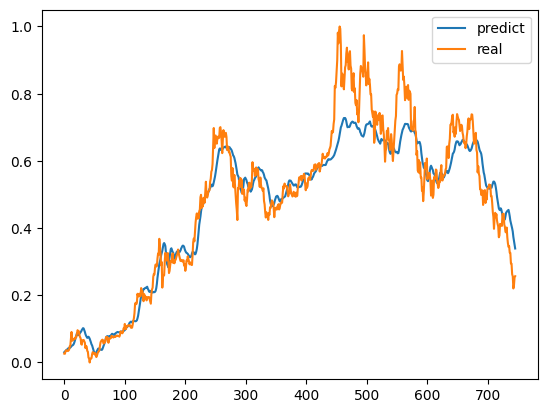

In [73]:
p =a.predict(np.array(A))
plt.plot(p, label="predict")
plt.plot(np.array(b), label="real")
plt.legend()
plt.show()

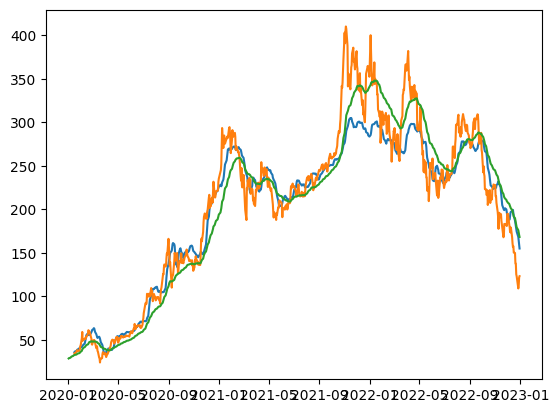

In [74]:
plt.plot(df.index[lag:],scaler.inverse_transform(p))
plt.plot(df.index[lag:],scaler.inverse_transform(b))
plt.plot(df.ewm(20).mean())

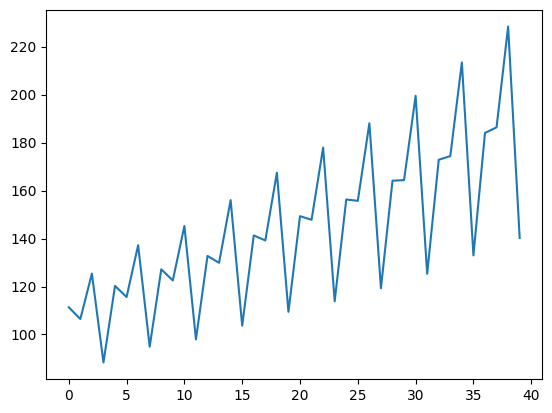

In [19]:
plt.plot(keyon)